# Explore data
## Import necessary libraries

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

## Read data from file

In [36]:
ds_survey_df = pd.read_csv('../Dataset/final_data.csv', low_memory=False)
ds_survey_df.head()

,Duration (in seconds),Age,Gender,Residential country,Student?,DS Platform (Coursera),DS Platform (edX),DS Platform (Kaggle Learn Courses),DS Platform (DataCamp),DS Platform (Fast.ai),...,Favorite media sources (Reddit),Favorite media sources (Kaggle),Favorite media sources (Course Forums),Favorite media sources (YouTube),Favorite media sources (Podcasts),Favorite media sources (Blogs),Favorite media sources (Journal Publications),Favorite media sources (Slack),Favorite media sources (None),Favorite media sources (Other)
0,121.0,30-34,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,462.0,30-34,Man,Algeria,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,293.0,18-21,Man,Egypt,Yes,Coursera,edX,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
3,851.0,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
4,232.0,45-49,Man,India,Yes,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN


### 3. How are values in numeric columns distributed?

In [37]:
def missing_ratio(column):
    missing_values = column.isnull().sum()
    total_values = len(column)
    return (missing_values / total_values) * 100

In [38]:
num_col_info_df = ds_survey_df.select_dtypes(include=['float64']).dropna(axis=1)

missing_ratios = num_col_info_df.agg([missing_ratio])
attribute = num_col_info_df.describe()

num_col_info_df = pd.concat([missing_ratios, attribute], axis = 0)
num_col_info_df

,Duration (in seconds)
missing_ratio,0.000000e+00
count,2.399700e+04
mean,1.009010e+04
std,1.115403e+05
min,1.200000e+02
25%,2.640000e+02
50%,4.140000e+02
75%,7.150000e+02
max,2.533678e+06


In this dataset, there is only the Duration column is numeric columns.     
The maximum duration takes to complete the survey is very strange. 

### 3. How are values in non-numeric columns distributed?

#### **A. One choice question**: 
First, we will consider colmuns with one choice.

##### Ratio of missing value:

In [39]:
one_choice_cols = ['Age', 'Gender',  'Residential country', 'Student?', 'Higher education?', 'Academic research publication?',
                   'Programming experience', 'ML experience', 'Current role', 'Current industry', 'Company size','Individual responsibility',
                    'Incorporate ML methods', 'Current income', 'Money spend for ML/Cloud', 'Familiar Cloud Platform', 'TPU experience']
one_choice_cols_df = ds_survey_df[one_choice_cols]

missing_ratios_df = one_choice_cols_df.agg(missing_ratio).to_frame()
missing_ratios_df.columns = ['Missing ratio']

missing_ratios_df

,Missing ratio
Age,0.000000
Gender,0.000000
Residential country,0.000000
Student?,0.000000
Higher education?,2.496145
Academic research publication?,48.489395
Programming experience,3.142059
ML experience,17.131308
Current role,55.702796
Current industry,62.103596


Here are some observations based on the missing ratios dataframe:
- Age, Gender, Residential country, and Student? columns have no missing values (0% missing ratio).
- Higher education? and Programming experience column has a missing ratio of 2.5% and 3.1%, indicating that a small percentage of survey participants did not provide information about their higher education and progamming experience.
- All other columns, also have the average missing ratios.    
- Specially, Familiar Cloud Platform and TPU experience columns have a very large precentage of missing values (up to 92% and 80%). We will drop these columns.

In [40]:
ds_survey_df.drop(columns= ['Familiar Cloud Platform', 'TPU experience'], inplace= True)


Then, we will find the distribution of values in each columns.    
In this case, I just regard the distribution values that are not NaN.
##### - **Age of participants:**


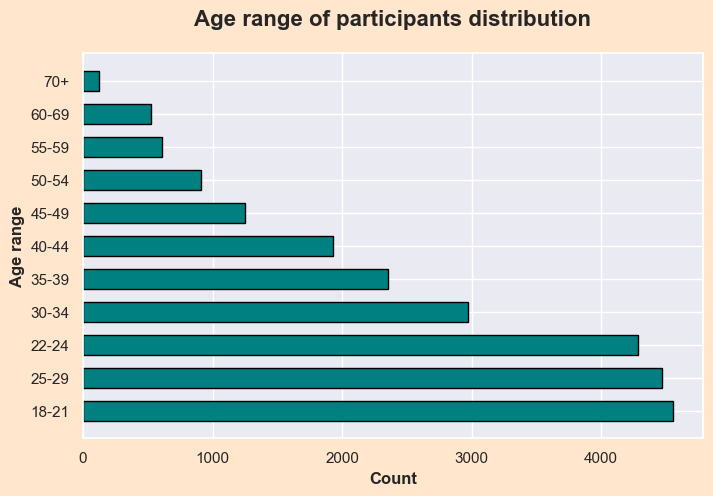

In [41]:

age_df = ds_survey_df['Age']
age_counts = age_df.value_counts()

# Sort values by frequency in descending order
sorted_age_counts = age_counts.sort_values(ascending=False)

sns.set()
fig, ax = plt.subplots(figsize=(8, 5))
ax = ax.barh(sorted_age_counts.keys(), sorted_age_counts, edgecolor = 'black', color = '#008080', height = 0.6)
plt.xlabel('Count', fontweight = 'bold')
plt.ylabel('Age range', fontweight = 'bold')
plt.title('Age range of participants distribution', fontsize = '16', fontweight = 'bold', pad = '20')

fig = plt.gcf()
fig.set_facecolor('#ffe6cc')

plt.show()

Based on the plot, we can observe that the majority of survey participants' age is in the range of approximately 18 to 39 years old.

##### - **Gender of participants:**

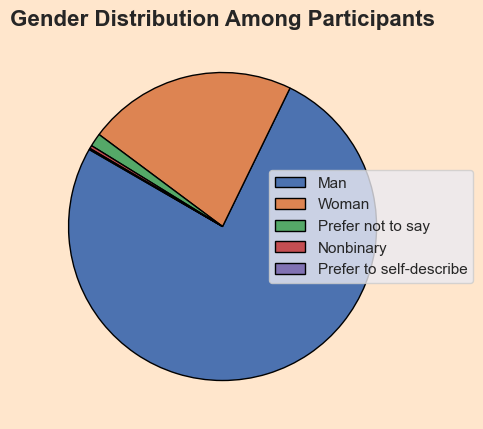

In [42]:
gender_df = ds_survey_df['Gender']
gender_count = gender_df.value_counts()

fig, ax = plt.subplots(figsize=(8, 5))
ax = ax.pie(gender_count ,startangle = 150,  wedgeprops={'edgecolor': 'black','linewidth': 1})
plt.legend(labels = gender_count.keys(), loc='center left', bbox_to_anchor=(0.6, 0.5), )
plt.title('Gender Distribution Among Participants', fontsize = '16', fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

Up to 75% of participants is man.

##### - **Current residential countries of participants:**

In [43]:
countries_df = ds_survey_df['Residential country']
countries_count = countries_df.value_counts().reset_index()

title = "Survey participants around the World"

fig = px.choropleth(countries_count, 
                    locations='Residential country', 
                    locationmode='country names',
                    color='count',
                    hover_name='Residential country',
                    title= title,
                    color_continuous_scale= 'YlOrBr' 
                    )

fig.update_layout(
            title_font_size = 30,
                 width = 800,
                 height = 450,
                 margin=dict(l=20, r=20, t=70, b=0),
                paper_bgcolor='#ffe6cc'
                 )

fig.show(config=dict({'scrollZoom':False}))

Most paticipants of this survey are from India and The USA

##### - **Education status of participants ( currently be a student or not):**

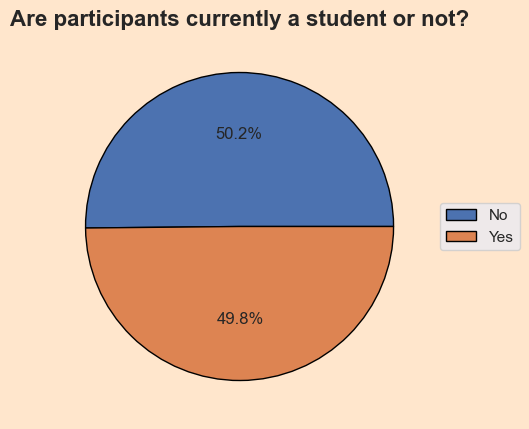

In [44]:
education_df = ds_survey_df['Student?']
education_count = education_df.value_counts()

fig, ax = plt.subplots(figsize=(8, 5))
ax = ax.pie(education_count, autopct="%1.1f%%", wedgeprops={'edgecolor': 'black','linewidth': 1})
plt.legend(labels = education_count.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Are participants currently a student or not?', fontsize = '16', fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

There is a equal percentage of participants who are currently students with those are not. We can get more insights from this observation in further analysis.

##### - **Highest level of education in the next 2 years:**


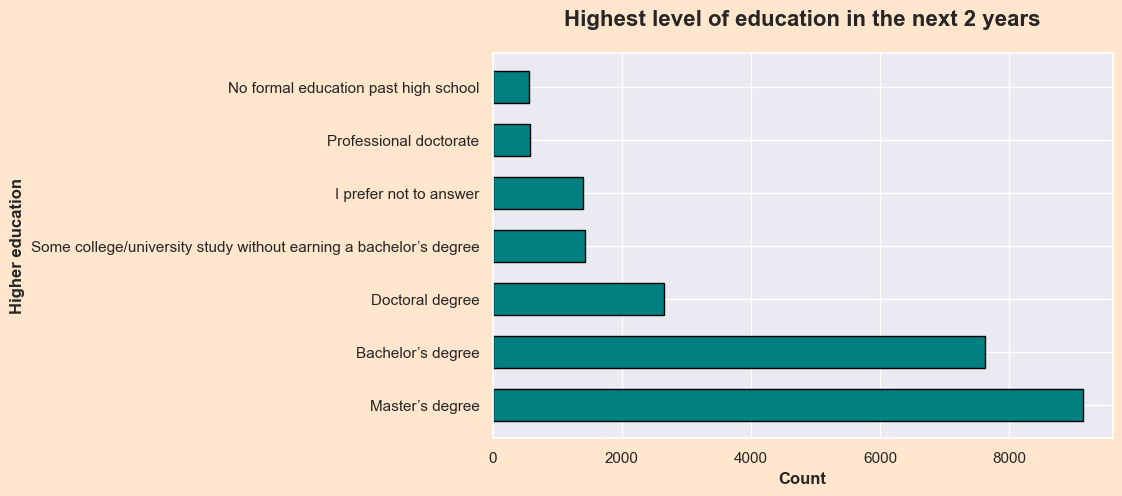

In [48]:
higher_edu_df = ds_survey_df['Higher education?']
higher_edu_count = higher_edu_df.value_counts()

higher_edu_count.sort_values(ascending = False,inplace= True)

fig, ax = plt.subplots(figsize=(8, 5))
ax = ax.barh(higher_edu_count.keys(), higher_edu_count, edgecolor = 'black', color = '#008080', height = 0.6)
plt.xlabel('Count', fontweight = 'bold')
plt.ylabel('Higher education', fontweight = 'bold')
plt.title('Highest level of education in the next 2 years', fontsize = '16', fontweight = 'bold', pad = '20')

fig = plt.gcf()
fig.set_facecolor('#ffe6cc')

plt.show()

##### - **Academic research publication?**

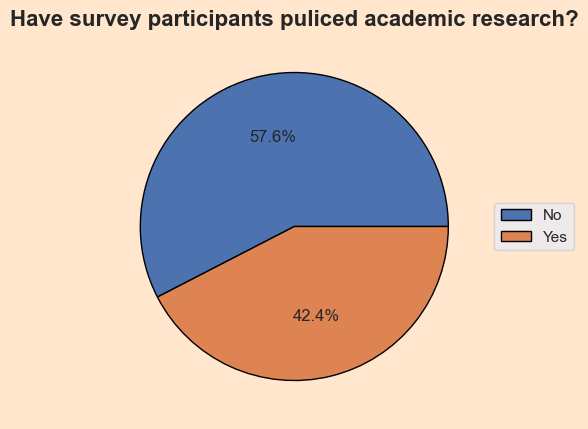

In [15]:
academic_research = ds_survey_df['Academic research publication?']

academic_research_count = academic_research.value_counts()

fig, ax = plt.subplots(figsize=(8, 5))
ax = ax.pie(academic_research_count,  autopct="%1.1f%%", wedgeprops={'edgecolor': 'black','linewidth': 1})
plt.legend(labels = academic_research_count.keys(), loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Have survey participants puliced any academic research?', fontsize = '16', fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

##### - **Programming experience (in year) of participants:**

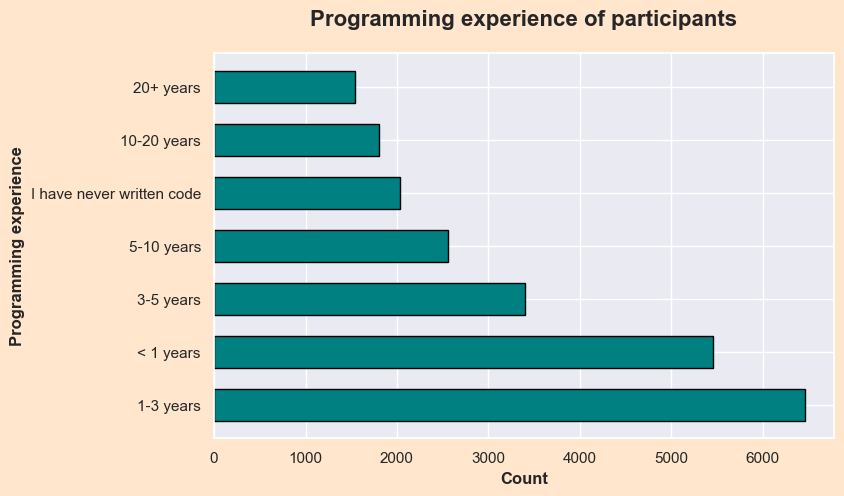

In [50]:
exp_year_df = ds_survey_df['Programming experience']
count_exp_year_df = exp_year_df.value_counts()
count_exp_year_df.sort_values(ascending = False, inplace = True)

fig, ax = plt.subplots(figsize=(8, 5))
ax = ax.barh(count_exp_year_df.keys(), count_exp_year_df, edgecolor = 'black', color = '#008080', height = 0.6)
plt.xlabel('Count', fontweight = 'bold')
plt.ylabel('Programming experience', fontweight = 'bold')
plt.title('Programming experience of participants', fontsize = '16', fontweight = 'bold', pad = '20')

fig = plt.gcf()
fig.set_facecolor('#ffe6cc')

plt.show()

Most of survey participants have the programming experience in from 1 to 3 years.

##### - **Machine learning experience (in year):**

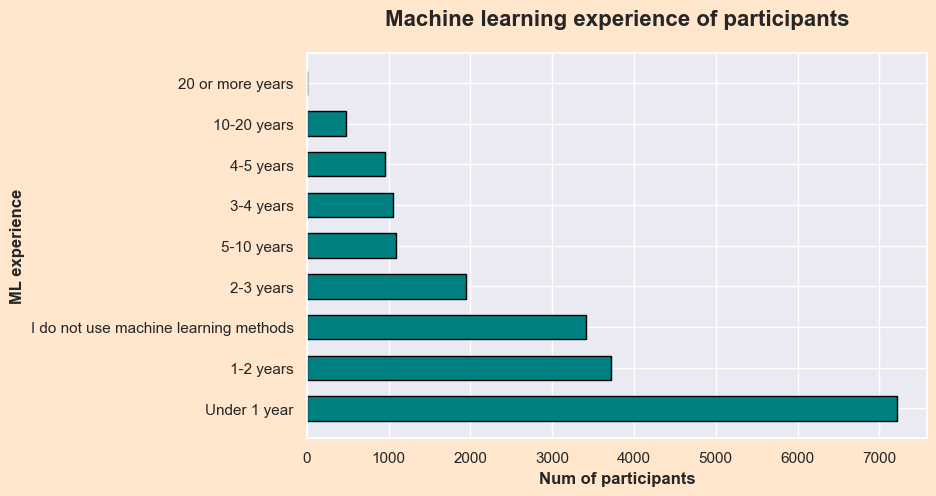

In [51]:
ml_exp_df = ds_survey_df['ML experience']
count_ml_exp_df = ml_exp_df.value_counts()
count_ml_exp_df.sort_values(ascending = False, inplace = True)

fig, ax = plt.subplots(figsize=(8, 5))
ax = ax.barh(count_ml_exp_df.keys(), count_ml_exp_df, edgecolor = 'black', color = '#008080', height = 0.6)
plt.xlabel('Num of participants', fontweight = 'bold')
plt.ylabel('ML experience', fontweight = 'bold')
plt.title('Machine learning experience of participants', fontsize = '16', fontweight = 'bold', pad = '20')


fig = plt.gcf()
fig.set_facecolor('#ffe6cc')

plt.show()

##### - **Current role of participants:**

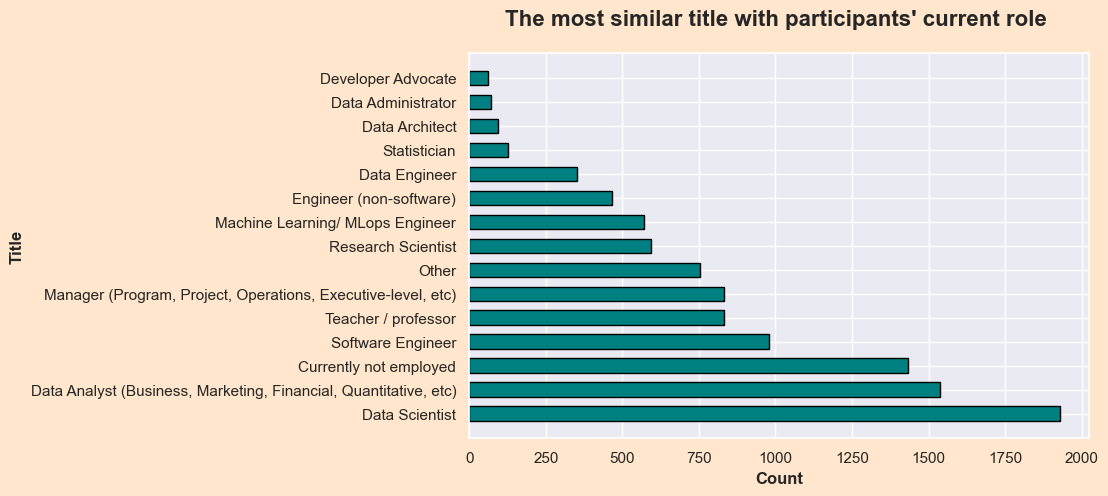

In [53]:
role_df = ds_survey_df['Current role']
count_role_df = role_df.value_counts()

count_role_df.sort_values(ascending=False, inplace= True)

fig, ax = plt.subplots(figsize=(8, 5))
ax = ax.barh(count_role_df.keys(), count_role_df, edgecolor = 'black', color = '#008080', height = 0.6)
plt.xlabel('Count', fontweight = 'bold')
plt.ylabel('Title', fontweight = 'bold')
plt.title('The most similar title with participants\' current role ', fontsize = '16', fontweight = 'bold', pad = '20')


fig = plt.gcf()
fig.set_facecolor('#ffe6cc')

plt.show()

##### - **Current Industry:**

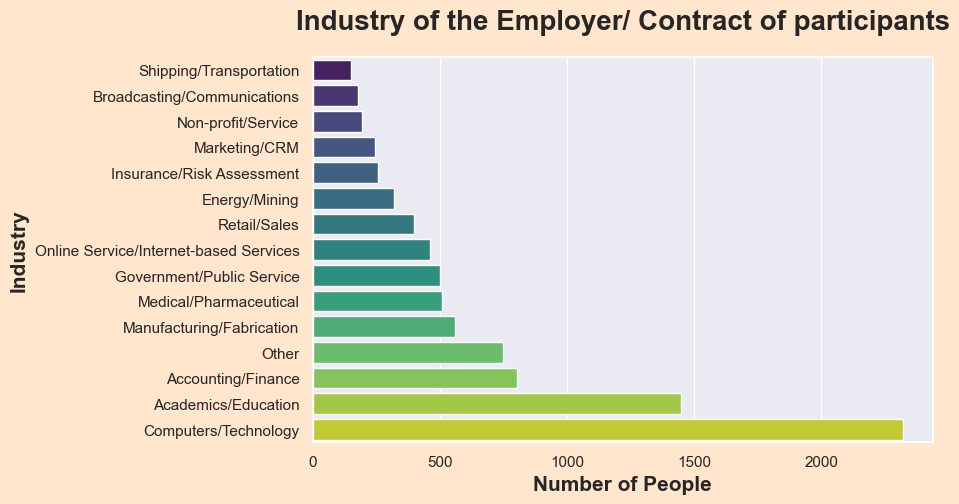

In [54]:
industry_df = ds_survey_df['Current industry']
count_industry_df = industry_df.value_counts()

count_industry_df.sort_values(ascending = True, inplace= True)

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y=count_industry_df.keys(), x=count_industry_df, palette='viridis')

plt.title('Industry of the Employer/ Contract of participants', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Industry', fontsize=15,  fontweight = 'bold')
plt.xlabel('Number of People', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

##### -  **Company size:**

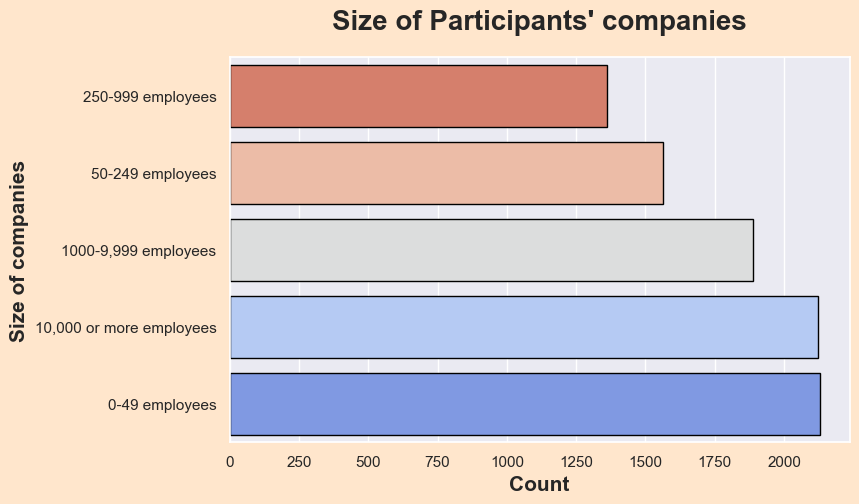

In [55]:
size_df = ds_survey_df['Company size']
count_size_df = size_df.value_counts()

count_size_df.sort_values(ascending = True, inplace = True)

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = count_size_df.keys(), x = count_size_df, palette ='coolwarm_r', edgecolor='black')

plt.title('Size of Participants\' companies', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Size of companies', fontsize=15,  fontweight = 'bold')
plt.xlabel('Count', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()


##### -  **Individual responible:**

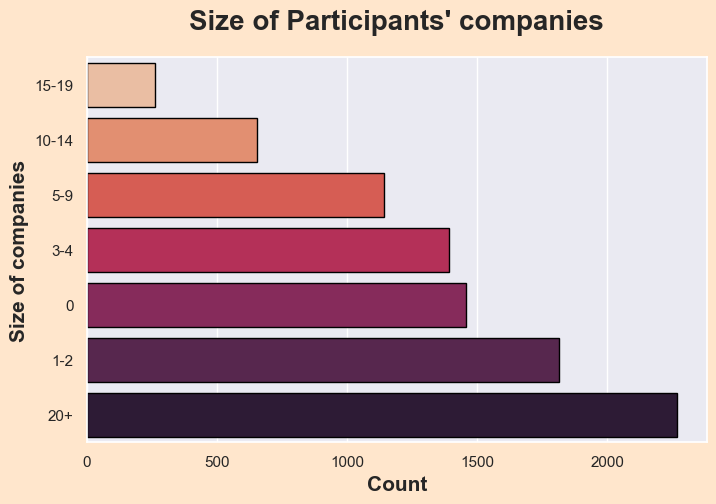

In [58]:
res_df = ds_survey_df['Individual responsibility']
count_res_df = res_df.value_counts()

count_res_df.sort_values(ascending = True, inplace= True)

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = count_res_df.keys(), x = count_res_df, palette ='rocket_r', edgecolor='black')

plt.title('Size of Participants\' companies', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Size of companies', fontsize=15,  fontweight = 'bold')
plt.xlabel('Count', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

##### -  **Incorporate Machine Learning methods:**

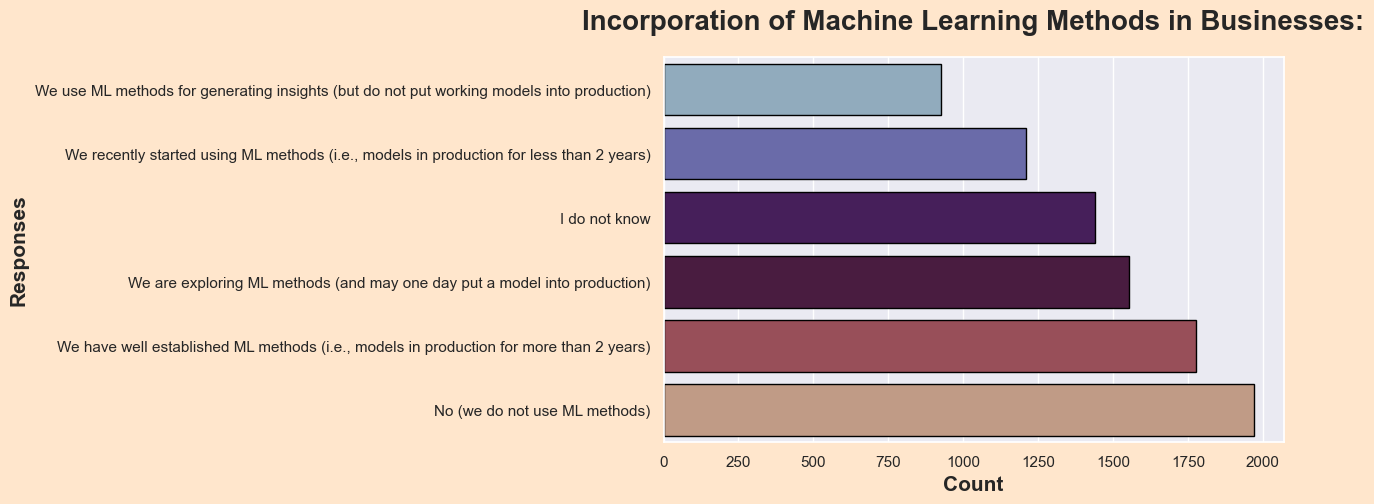

In [61]:
method_df = ds_survey_df['Incorporate ML methods']
count_method_df = method_df.value_counts()

count_method_df.sort_values(ascending = True, inplace= True)

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = count_method_df.keys(), x = count_method_df, palette ='twilight', edgecolor='black')

plt.title('Incorporation of Machine Learning Methods in Businesses?', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Responses', fontsize=15,  fontweight = 'bold')
plt.xlabel('Count', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

##### - **Current income:**


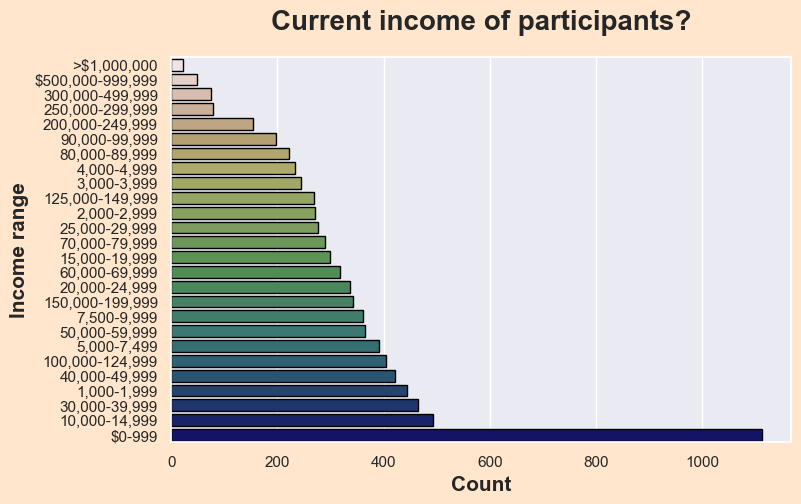

In [68]:
income_df = ds_survey_df['Current income']
count_income_df = income_df.value_counts()

count_income_df.sort_values(ascending = True, inplace= True)

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = count_income_df.keys(), x = count_income_df, palette ='gist_earth_r', edgecolor='black')

plt.title('Current income of participants?', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Income range', fontsize=15,  fontweight = 'bold')
plt.xlabel('Count', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

##### -  **Money spend for ML/Cloud:**




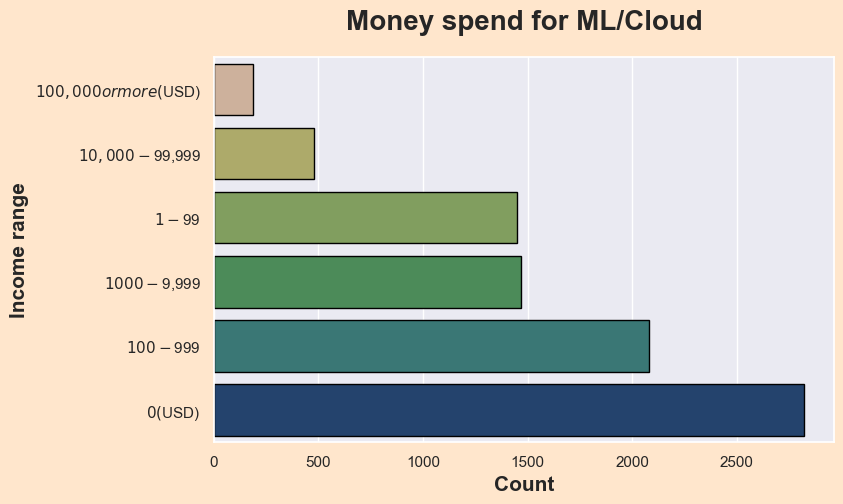

In [70]:
money_spend_df = ds_survey_df['Money spend for ML/Cloud']
count_money_spend_df = money_spend_df.value_counts()

count_money_spend_df.sort_values(ascending = True, inplace= True)

fig, ax = plt.subplots(figsize=(8,5))
ax = sns.barplot(y = count_money_spend_df.keys(), x = count_money_spend_df, palette ='gist_earth_r', edgecolor='black')

plt.title('Money spend for ML/Cloud', fontsize=20, fontweight = 'bold', pad = '20')
plt.ylabel('Income range', fontsize=15,  fontweight = 'bold')
plt.xlabel('Count', fontsize=15,  fontweight = 'bold')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()

So with the missing ratio, we need to drop columns that have missing ratios over 75%

#### **B. Multiple choice question**: 

##### **Data science Platform:**

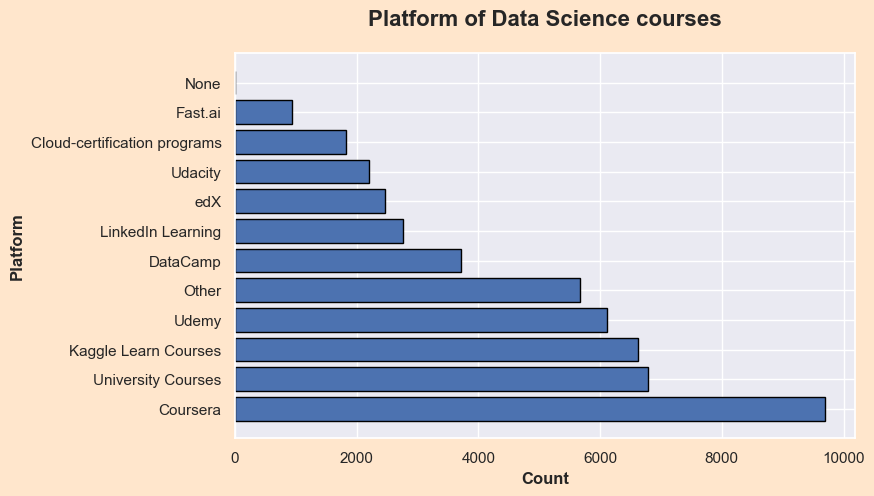

In [67]:

ds_platform_df = ds_survey_df.loc[ : ,'DS Platform (Coursera)' : 'DS Platform (Other)']
ds_platform_count = ds_platform_df.count()
sorted_ds_platform_count = ds_platform_count.sort_values(ascending= False)

platform = sorted_ds_platform_count.keys().str.extract(r'\(([^\)]+)\)')

fig, ax = plt.subplots(figsize=(8, 5))
ax = ax.barh( platform[0], sorted_ds_platform_count.values, edgecolor = 'black')
plt.xlabel('Count', fontweight = 'bold')
plt.ylabel('Platform', fontweight = 'bold')
plt.title('Platform of Data Science courses', fontsize = '16', fontweight = 'bold', pad = '20')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()


##### **Most helpful platform for participants to start studing Data Science:**

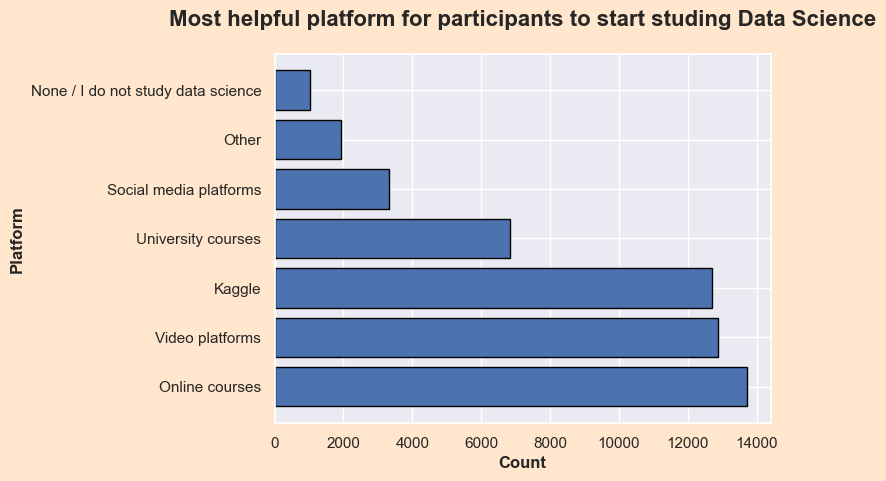

In [69]:
most_helpful_platform_df = ds_survey_df.loc[:,'Most helpful Platform (University courses)':'Most helpful Platform (Other)']

df_count = most_helpful_platform_df.count()

sorted_count = df_count.sort_values(ascending= False)
platform = sorted_count.keys().str.extract(r'\(([^\)]+)\)')

fig, ax = plt.subplots()
ax = ax.barh(platform[0], sorted_count.values, edgecolor = 'black')
plt.xlabel('Count', fontweight = 'bold')
plt.ylabel('Platform', fontweight = 'bold')
plt.title('Most helpful platform for participants to start studing Data Science', fontsize = '16', fontweight = 'bold', pad = '20')
fig = plt.gcf()
fig.set_facecolor('#ffe6cc')
plt.show()